<a href="https://colab.research.google.com/github/A01793469/CO2MassBalance_Equipo6/blob/main/Avance2_Equipo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

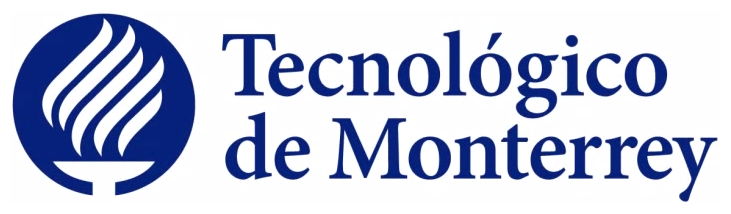

# PROYECTO INTEGRADOR: CO2 Mass Balance

# Avance 2. Ingeniería de características

# PRESENTADO POR:

## Miguel Ángel Aguilera Rodríguez - A00642541

## Carlos Jesús Peñaloza Julio - A01793931

## Alberto Patraca Sotomayor - A01793469

# PROFESORA:

##Dra. Grettel Barceló Alonso

##Dra. Eduviges Ludivina Facundo Flores

# **Avance 1. Análisis exploratorio de datos**

**2.1 Elegir las características más relevantes para reducir la dimensionalidad y aumentar la capacidad de generalización del modelo.**

In [199]:
# Lo primero que realizamos es importar las librerías requeridas
import os # Nos ayuda al manejo de archivos y rutas de archivos
import json  # Es de gran utilizad para manejar archivos .json
import datetime # Manejo de fechas y horas
import warnings

import numpy as np # Funcional para el manejo de matrices de datos
import pandas as pd # Muy útil para el manejo de dataframes

from google.colab import drive # Se utiliza para conectarse con drive y leer los archivos del mismo

In [200]:
pd.set_option('display.max_columns', 3000) # Cambiamos la cantidad de columnas máximas que se muestran
warnings.filterwarnings('ignore')

In [201]:
drive.mount('/content/drive') # Montamos el drive, para poder acceder al archivo del dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
# Definimos el folder donde se encuentran los datos y leemos el json con las
# capacidades de los tanques

data_folder = '/content/drive/MyDrive/PI - CO2 Mass Balance/data'
tank_capacity_json = 'CO2_UT_VOL_202409271421.json'

tank_capacity_path = os.path.join(data_folder, tank_capacity_json)

with open(tank_capacity_path, 'r') as json_file:
    tanks_capacities_dict = json.load(json_file)

tanks_capacities_dict

{'13': 6800,
 '14': 6800,
 '15': 6800,
 '16': 6800,
 '17': 6800,
 '18': 6800,
 '19': 6800,
 '20': 6800,
 '21': 6800,
 '22': 6800,
 '23': 2200,
 '24': 2200,
 '25': 2200,
 '26': 2200,
 '27': 6800,
 '28': 6800,
 '29': 6800,
 '30': 6800,
 '31': 6800,
 '32': 6800,
 '33': 6800,
 '34': 6800,
 '35': 6800,
 '36': 6800,
 '37': 2100,
 '38': 2100,
 '39': 2100,
 '40': 2100,
 '41': 4100,
 '42': 8600,
 '43': 8600,
 '44': 8600,
 '45': 8600,
 '46': 8600,
 '47': 8600,
 '48': 8600,
 '49': 8600,
 '50': 4100}

El diccionario es información sencilla de observar, ya que son pocos valores y con relación 1 a 1, por lo que el análisis es sencillo, notamos que no hay valores erróneos (atípicos, nulos, o en formato incorrecto)

In [203]:
# Leemos el dataset de los registros de los tanques, con las fechas e informaación.

registers_name = 'CO2_Connection_202409271420.csv'
registers_path = os.path.join(data_folder, registers_name)

registers_df = pd.read_csv(registers_path)

registers_df.head()

,UT,Brand,FillingStart,FillingEnd,ConnStart,ConnEnd
0,13,Amstel Utra,2022-04-12 11:43:00,2022-04-12 22:05:00,2022-04-13 13:00:00,2022-04-17 11:00:00
1,13,Carta Blanca,2022-01-17 15:49:00,2022-01-18 00:59:00,2022-01-18 19:00:00,2022-01-22 09:00:00
2,13,Carta Blanca,2022-03-21 06:21:00,2022-03-21 15:47:00,2022-03-22 17:00:00,2022-03-26 02:34:00
3,13,Carta Blanca,2022-04-22 04:32:00,NaN,2022-04-23 05:12:00,2022-04-28 06:00:00
4,13,Carta Blanca,2022-05-27 07:50:00,2022-05-27 16:05:00,2022-05-28 07:00:00,2022-06-01 05:36:00


Notamos que contamos con 4 columnas referentes a fechas, de las cuales solo nos interesan la de Inicio y Fin de conexión. Los de llenado no son tan relevantes.

In [204]:
registers_df.dtypes

,0
UT,int64
Brand,object
FillingStart,object
FillingEnd,object
ConnStart,object
ConnEnd,object


In [205]:
#Imprimimos el tamaño del dataframe
registers_df.shape

(1246, 6)

Podemos notar que tenemos 3 variables son categóricas: el UT y Brand (Marca), procedemos a obtener sus cardinalidades.

Respecto al UT, no consideramos corroborar la cardinalidad de dicha información, debido a que posteriormente no lo utilizaremos, convirtiéndolo en la capacidad del tanque, que es lo que realmente nos interesa y donde sí podemos manejar esa información.

In [206]:
registers_df.Brand.unique()

array(['Amstel Utra', 'Carta Blanca', 'Coors Light', 'Miller', 'Sol',
       'Tecate', 'Tecate Light', 'RIZZOS', 'TKT R', 'TTKL', 'Bohemia',
       'TK', 'TKTL 6', 'RIZOS', 'Noche Buena'], dtype=object)

Observamos las 15 opciones, sin embargo, notamos que hay varias que son las mismas pero con diferentes nombres, procedemos a unificarlas.

In [207]:
registers_df.Brand.value_counts()

,count
Brand,
Tecate Light,546
Sol,196
Tecate,150
Carta Blanca,145
Miller,73
Amstel Utra,72
Coors Light,42
Bohemia,10
Noche Buena,4


Realmente en este punto, no es de valor realizar análisis estadísticos en esta base de datos, debido a que la mayor cantidad de datos son fechas, y los otros son básicamente los nombres de los tanques.

In [208]:
# Finalmente, leemos el archivo de los registros de flujo de CO2 en la sección de producción
flow_name = 'Flujo_CO2_Recuperado.csv'
flow_path = os.path.join(data_folder, flow_name)

flow_df = pd.read_csv(flow_path)
flow_df.head(10)

,tag_uuid,measured_at,value,event_day
0,nnmN3z283WMuizp7fnss4H,2022-11-11 19:27:48.947,3065.975586,2022-11-11
1,nnmN3z283WMuizp7fnss4H,2022-11-11 19:28:08.541,3013.935791,2022-11-11
2,nnmN3z283WMuizp7fnss4H,2022-11-11 19:29:09.060,2971.429932,2022-11-11
3,nnmN3z283WMuizp7fnss4H,2022-11-11 19:29:29.410,3016.319336,2022-11-11
4,nnmN3z283WMuizp7fnss4H,2022-09-11 08:55:08.658,2542.399902,2022-09-11
5,nnmN3z283WMuizp7fnss4H,2022-08-09 05:57:50.883,2845.898926,2022-08-09
6,nnmN3z283WMuizp7fnss4H,2022-08-09 05:58:50.343,2804.584961,2022-08-09
7,nnmN3z283WMuizp7fnss4H,2023-01-05 21:27:36.454,2374.363281,2023-01-05
8,nnmN3z283WMuizp7fnss4H,2023-01-05 21:27:59.604,2354.103516,2023-01-05
9,nnmN3z283WMuizp7fnss4H,2022-08-09 05:30:26.478,2484.401611,2022-08-09


In [209]:
flow_df.dtypes

,0
tag_uuid,object
measured_at,object
value,float64
event_day,object


In [210]:
# Imprimimos el tamaño de este dataframe
flow_df.shape

(2781109, 4)

Podemos notar que este dataset es más compacto, en términos de elementos, pero posee mayor cantidad de datos en esa única columna. Sin embargo, al ser un elemento numérico, podemos obtener ciertas estadísticas de este.

Además, esa única columna es de las más importantes, ya que es el objetivo de nuestro proyecto, poder predecir el flujo o generación de CO2.

In [211]:
# Obtenemos algunas estadísticas de la columna de flujo equivalente a value
flow_df.describe()

,value
count,2.781109e+06
mean,2.328132e+03
std,6.365585e+02
min,-3.972500e+02
25%,1.940566e+03
50%,2.372774e+03
75%,2.771613e+03
max,6.553433e+03


Teniendo en cuenta la observación hecha, se seguirá trabajando con los valores de la columna "value" que es la que equivale al flujo en cada unidad de tiempo

Sobre el dataset se harán los siguientes cambios de tal manera que podamos seguir trabajando con la columna objetiva de flujo

In [212]:
# Eliminar la columna 'tag_uuid' y 'event_day	'
flow_df = flow_df.drop(['tag_uuid', 'event_day'], axis=1)

# Cambiar el nombre de la columna 'value' a 'CO2 flow(l)'
flow_df = flow_df.rename(columns={'value': 'CO2 flow(l)'})

# Cambiar el nombre de la columna 'measured_at' a 'datetime'
#flow_df = flow_df.rename(columns={'measured_at': 'datetime'})

flow_df.head()

,measured_at,CO2 flow(l)
0,2022-11-11 19:27:48.947,3065.975586
1,2022-11-11 19:28:08.541,3013.935791
2,2022-11-11 19:29:09.060,2971.429932
3,2022-11-11 19:29:29.410,3016.319336
4,2022-09-11 08:55:08.658,2542.399902


También podemos notar que en este rubro, tenemos una gran dependencia temporal, nuestra producción depende enteramente del tiempo que transcurra, además de factores que ya conocemos como la cantidad de cerveza conectada a la sección de producción, y su tipo.

En resumen, podemos definiar como las características de nuestro interés las siguientes:


*   Capacidad de cada tanque
*   Marca de cerveza
*   Fecha y hora de inicio de conexión de los tanques a la producción de CO2
*   Fecha y hora de fin de conexión de los tanques a la producción de CO2
*   Flujo de CO2 por segundo
*   Número de tanque
*   Fecha y hora del fin de llenado, usado como referencia para la edad



**2.2 Abordar y corregir los problemas identificados en los datos.**

En primera instancia, sabemos que en el diccionario de capacidades, no tenemos ningún dato nulo o erróneo, procederemos con los dataframes.

In [213]:
registers_df.isna().sum()

,0
UT,0
Brand,0
FillingStart,0
FillingEnd,15
ConnStart,26
ConnEnd,60


In [214]:
registers_df.isnull().sum()

,0
UT,0
Brand,0
FillingStart,0
FillingEnd,15
ConnStart,26
ConnEnd,60


Con lo anterior podemos demostrar que poseemos datos nulos y erróneos, que seguramente son los mismos, únicamente que duplicados. Nuestra decisión de cómo manejaros es simplemente quitar los registros con este tipo de datos y observar cuántos registros totales realmente se eliminan (ya que varios pueden encontrarse en los mismos renglones)

In [215]:
registers_df.dropna(inplace=True)
registers_df.shape

(1162, 6)

In [216]:
registers_df.isna().sum()

,0
UT,0
Brand,0
FillingStart,0
FillingEnd,0
ConnStart,0
ConnEnd,0


In [217]:
registers_df.isnull().sum()

,0
UT,0
Brand,0
FillingStart,0
FillingEnd,0
ConnStart,0
ConnEnd,0


Perdimos 84 registros (alrededor de un 6% del dataset original), no consideramos que sea mucha la información perdida, y procedemos de esta manera.

In [218]:
registers_df.Brand.value_counts()

,count
Brand,
Tecate Light,513
Sol,193
Tecate,139
Carta Blanca,131
Miller,67
Amstel Utra,62
Coors Light,39
Bohemia,7
Noche Buena,4


In [219]:
registers_df.replace('TTKL', 'Tecate Light', inplace=True)
registers_df.replace('TKTL 6', 'Tecate Light', inplace=True)
registers_df.replace('TK', 'Tecate', inplace=True)
registers_df.replace('TKT R', 'Tecate', inplace=True)

In [220]:
registers_df.Brand.value_counts()

,count
Brand,
Tecate Light,516
Sol,193
Tecate,141
Carta Blanca,131
Miller,67
Amstel Utra,62
Coors Light,39
Bohemia,7
Noche Buena,4


Luego de la elimianación de datos nulos y de clases repetidas (con diferente nombre) terminamos con una cardinalidad de 10 en las marcas, donde podemos notar claramente que la distribución no es pareja. Hay gran diferencia entre cada escalón de las marcas.

In [221]:
flow_df.isna().sum()

,0
measured_at,0
CO2 flow(l),0


In [222]:
flow_df.isnull().sum()

,0
measured_at,0
CO2 flow(l),0


Comprobamos que tampoco tenemos datos erróneos ni nulos en nuestro dataframe de flujo.

*   En este punto, aún no podemos obtener correlaciones, en cada tabla hay pocos datos numéricos, por lo que por separado no hay ninguna relación que los ubique, aún debemos agrupar los datos.
*   Al ubicarlos en un mismo dataframe donde tengamos todas y únicamente nuestras variables de interés, ahí realizaremos un análisis más exhaustivo en términos de correlación y modificaciones que tengamos que hacer, esto lo realizaremos en la siguiente entrega. En primera instancia consideramos que lógicamente, debe haber una correlación directa fuerte entre la cantidad de cerveza total que se encuentra en los tanques que suministran, y la cantidad de CO2 producida.



# **Avance 2. Ingeniería de características**

**2.3 Crear nuevas características para mejorar el rendimiento de los modelos**

In [223]:
"""
Como primer paso en la agrupación de los datos, crearemos un dataframe
nuevo, que será el que manejaremos para el resto del proyecto, tomaremos los
flujos por segundo y los pasaremos a flujos diarios.
"""
# Creamos una copia del dataset original para poder modificarlo sin problema
temp_flow_df = flow_df.copy()
temp_flow_df['date'] = flow_df['measured_at'].map(lambda x: x[:11])
temp_flow_df

,measured_at,CO2 flow(l),date
0,2022-11-11 19:27:48.947,3065.975586,2022-11-11
1,2022-11-11 19:28:08.541,3013.935791,2022-11-11
2,2022-11-11 19:29:09.060,2971.429932,2022-11-11
3,2022-11-11 19:29:29.410,3016.319336,2022-11-11
4,2022-09-11 08:55:08.658,2542.399902,2022-09-11
...,...,...,...
2781104,2024-09-27 15:50:24.081,1489.687500,2024-09-27
2781105,2024-09-11 20:19:47.862,2117.342500,2024-09-11
2781106,2024-09-11 20:20:11.636,2115.753400,2024-09-11
2781107,2024-09-11 20:20:32.909,2091.124000,2024-09-11


In [224]:
#Creamos el dataframe objetivo
target_df = pd.DataFrame()

target_df['date(yyyy-mm-dd)'] = temp_flow_df.date.unique()
target_df.head(10)

,date(yyyy-mm-dd)
0,2022-11-11
1,2022-09-11
2,2022-08-09
3,2023-01-05
4,2022-10-29
5,2022-10-23
6,2022-09-19
7,2022-12-15
8,2022-10-18
9,2022-11-12


In [225]:
def sum_flow_per_date(date, input_df):
    temp_df = input_df[input_df['date'] == date]
    flow_sum = temp_df['CO2 flow(l)'].sum()
    return flow_sum

In [226]:
target_df['co2_flow(l)'] = target_df['date(yyyy-mm-dd)'].map(lambda x: sum_flow_per_date(x, temp_flow_df))
target_df.head(10)

,date(yyyy-mm-dd),co2_flow(l)
0,2022-11-11,8.657291e+06
1,2022-09-11,6.820917e+06
2,2022-08-09,7.979079e+06
3,2023-01-05,4.897387e+06
4,2022-10-29,7.717158e+06
5,2022-10-23,7.329410e+06
6,2022-09-19,8.533419e+06
7,2022-12-15,4.767682e+06
8,2022-10-18,7.320267e+06
9,2022-11-12,8.782855e+06


Una vez listos los flujos diarios, procedemos a agregar la capacidad de los tanques en el dataframe de los registros, para poder manejar mejor los pasos posteriores.

In [227]:
temp_registers_df = registers_df.copy() # Creamos una copia del dataframe original

# Nos apoyamos del diccionario para extraer las capacidades
temp_registers_df['capacity'] = temp_registers_df.UT.map(
    lambda x: tanks_capacities_dict[str(x)])
temp_registers_df.head(10)

,UT,Brand,FillingStart,FillingEnd,ConnStart,ConnEnd,capacity
0,13,Amstel Utra,2022-04-12 11:43:00,2022-04-12 22:05:00,2022-04-13 13:00:00,2022-04-17 11:00:00,6800
1,13,Carta Blanca,2022-01-17 15:49:00,2022-01-18 00:59:00,2022-01-18 19:00:00,2022-01-22 09:00:00,6800
2,13,Carta Blanca,2022-03-21 06:21:00,2022-03-21 15:47:00,2022-03-22 17:00:00,2022-03-26 02:34:00,6800
4,13,Carta Blanca,2022-05-27 07:50:00,2022-05-27 16:05:00,2022-05-28 07:00:00,2022-06-01 05:36:00,6800
5,13,Carta Blanca,2022-08-20 17:44:00,2022-08-21 02:25:00,2022-08-21 18:35:00,2022-08-26 17:36:00,6800
6,13,Carta Blanca,2022-11-30 01:38:00,2022-11-30 20:37:00,2022-12-01 08:00:00,2022-12-06 18:00:00,6800
7,13,Carta Blanca,2023-05-02 15:17:00,2023-05-02 23:39:00,2023-05-03 22:45:00,2023-05-08 05:00:00,6800
8,13,Coors Light,2022-05-03 20:22:00,2022-05-05 04:01:00,2022-05-05 10:00:00,2022-05-10 03:00:00,6800
9,13,Coors Light,2022-10-02 15:01:00,2022-10-04 03:00:00,2022-10-04 15:00:00,2022-10-09 17:00:00,6800
10,13,Coors Light,2023-01-30 12:27:00,2023-01-31 22:34:00,2023-02-01 11:00:00,2023-02-06 06:00:00,6800


Una vez tenemos esta información, el preprocesamiento se vuelve un poco más complejo, debido a que tenemos que crear una tabla temporal por cada marca existente, de manera que saquemos las capacidades relativas y las edades relativas en cada fecha de interés.

In [228]:
# Creamos las columnas específicas que nos ayudarán a no realizar tanto cálculos
# Separamos las fechas y horas
temp_registers_df.loc[:, ['start_con_date','end_con_date']] = \
    temp_registers_df.loc[:, ['ConnStart', 'ConnEnd']].map(
        lambda x: x[:11]).values

temp_registers_df.head(10)

,UT,Brand,FillingStart,FillingEnd,ConnStart,ConnEnd,capacity,start_con_date,end_con_date
0,13,Amstel Utra,2022-04-12 11:43:00,2022-04-12 22:05:00,2022-04-13 13:00:00,2022-04-17 11:00:00,6800,2022-04-13,2022-04-17
1,13,Carta Blanca,2022-01-17 15:49:00,2022-01-18 00:59:00,2022-01-18 19:00:00,2022-01-22 09:00:00,6800,2022-01-18,2022-01-22
2,13,Carta Blanca,2022-03-21 06:21:00,2022-03-21 15:47:00,2022-03-22 17:00:00,2022-03-26 02:34:00,6800,2022-03-22,2022-03-26
4,13,Carta Blanca,2022-05-27 07:50:00,2022-05-27 16:05:00,2022-05-28 07:00:00,2022-06-01 05:36:00,6800,2022-05-28,2022-06-01
5,13,Carta Blanca,2022-08-20 17:44:00,2022-08-21 02:25:00,2022-08-21 18:35:00,2022-08-26 17:36:00,6800,2022-08-21,2022-08-26
6,13,Carta Blanca,2022-11-30 01:38:00,2022-11-30 20:37:00,2022-12-01 08:00:00,2022-12-06 18:00:00,6800,2022-12-01,2022-12-06
7,13,Carta Blanca,2023-05-02 15:17:00,2023-05-02 23:39:00,2023-05-03 22:45:00,2023-05-08 05:00:00,6800,2023-05-03,2023-05-08
8,13,Coors Light,2022-05-03 20:22:00,2022-05-05 04:01:00,2022-05-05 10:00:00,2022-05-10 03:00:00,6800,2022-05-05,2022-05-10
9,13,Coors Light,2022-10-02 15:01:00,2022-10-04 03:00:00,2022-10-04 15:00:00,2022-10-09 17:00:00,6800,2022-10-04,2022-10-09
10,13,Coors Light,2023-01-30 12:27:00,2023-01-31 22:34:00,2023-02-01 11:00:00,2023-02-06 06:00:00,6800,2023-02-01,2023-02-06


In [229]:
temp_registers_df.loc[:, ['start_con_time','end_con_time']] = \
    temp_registers_df.loc[:, ['ConnStart', 'ConnEnd']].map(
        lambda x: x[-8:-3]).values

temp_registers_df.head(10)

,UT,Brand,FillingStart,FillingEnd,ConnStart,ConnEnd,capacity,start_con_date,end_con_date,start_con_time,end_con_time
0,13,Amstel Utra,2022-04-12 11:43:00,2022-04-12 22:05:00,2022-04-13 13:00:00,2022-04-17 11:00:00,6800,2022-04-13,2022-04-17,13:00,11:00
1,13,Carta Blanca,2022-01-17 15:49:00,2022-01-18 00:59:00,2022-01-18 19:00:00,2022-01-22 09:00:00,6800,2022-01-18,2022-01-22,19:00,09:00
2,13,Carta Blanca,2022-03-21 06:21:00,2022-03-21 15:47:00,2022-03-22 17:00:00,2022-03-26 02:34:00,6800,2022-03-22,2022-03-26,17:00,02:34
4,13,Carta Blanca,2022-05-27 07:50:00,2022-05-27 16:05:00,2022-05-28 07:00:00,2022-06-01 05:36:00,6800,2022-05-28,2022-06-01,07:00,05:36
5,13,Carta Blanca,2022-08-20 17:44:00,2022-08-21 02:25:00,2022-08-21 18:35:00,2022-08-26 17:36:00,6800,2022-08-21,2022-08-26,18:35,17:36
6,13,Carta Blanca,2022-11-30 01:38:00,2022-11-30 20:37:00,2022-12-01 08:00:00,2022-12-06 18:00:00,6800,2022-12-01,2022-12-06,08:00,18:00
7,13,Carta Blanca,2023-05-02 15:17:00,2023-05-02 23:39:00,2023-05-03 22:45:00,2023-05-08 05:00:00,6800,2023-05-03,2023-05-08,22:45,05:00
8,13,Coors Light,2022-05-03 20:22:00,2022-05-05 04:01:00,2022-05-05 10:00:00,2022-05-10 03:00:00,6800,2022-05-05,2022-05-10,10:00,03:00
9,13,Coors Light,2022-10-02 15:01:00,2022-10-04 03:00:00,2022-10-04 15:00:00,2022-10-09 17:00:00,6800,2022-10-04,2022-10-09,15:00,17:00
10,13,Coors Light,2023-01-30 12:27:00,2023-01-31 22:34:00,2023-02-01 11:00:00,2023-02-06 06:00:00,6800,2023-02-01,2023-02-06,11:00,06:00


In [230]:
# Finalmente agregamos la edad inicial de cada uno (en minutos), para ello creamos una función que nos ayude

def find_initial_age(init_df):
    dt_format = '%Y-%m-%d %H:%M:%S'
    end_fill = datetime.datetime.strptime(init_df['FillingEnd'], dt_format)
    start_con = datetime.datetime.strptime(init_df['ConnStart'], dt_format)
    #start_fill = datetime.datetime.strptime(init_df['FillingStart'], dt_format)
    delta = start_con - end_fill
    return int(delta.total_seconds()/60)

temp_registers_df['initial_age'] = temp_registers_df.apply(find_initial_age, axis=1)
temp_registers_df.head(10)

,UT,Brand,FillingStart,FillingEnd,ConnStart,ConnEnd,capacity,start_con_date,end_con_date,start_con_time,end_con_time,initial_age
0,13,Amstel Utra,2022-04-12 11:43:00,2022-04-12 22:05:00,2022-04-13 13:00:00,2022-04-17 11:00:00,6800,2022-04-13,2022-04-17,13:00,11:00,895
1,13,Carta Blanca,2022-01-17 15:49:00,2022-01-18 00:59:00,2022-01-18 19:00:00,2022-01-22 09:00:00,6800,2022-01-18,2022-01-22,19:00,09:00,1081
2,13,Carta Blanca,2022-03-21 06:21:00,2022-03-21 15:47:00,2022-03-22 17:00:00,2022-03-26 02:34:00,6800,2022-03-22,2022-03-26,17:00,02:34,1513
4,13,Carta Blanca,2022-05-27 07:50:00,2022-05-27 16:05:00,2022-05-28 07:00:00,2022-06-01 05:36:00,6800,2022-05-28,2022-06-01,07:00,05:36,895
5,13,Carta Blanca,2022-08-20 17:44:00,2022-08-21 02:25:00,2022-08-21 18:35:00,2022-08-26 17:36:00,6800,2022-08-21,2022-08-26,18:35,17:36,970
6,13,Carta Blanca,2022-11-30 01:38:00,2022-11-30 20:37:00,2022-12-01 08:00:00,2022-12-06 18:00:00,6800,2022-12-01,2022-12-06,08:00,18:00,683
7,13,Carta Blanca,2023-05-02 15:17:00,2023-05-02 23:39:00,2023-05-03 22:45:00,2023-05-08 05:00:00,6800,2023-05-03,2023-05-08,22:45,05:00,1386
8,13,Coors Light,2022-05-03 20:22:00,2022-05-05 04:01:00,2022-05-05 10:00:00,2022-05-10 03:00:00,6800,2022-05-05,2022-05-10,10:00,03:00,359
9,13,Coors Light,2022-10-02 15:01:00,2022-10-04 03:00:00,2022-10-04 15:00:00,2022-10-09 17:00:00,6800,2022-10-04,2022-10-09,15:00,17:00,720
10,13,Coors Light,2023-01-30 12:27:00,2023-01-31 22:34:00,2023-02-01 11:00:00,2023-02-06 06:00:00,6800,2023-02-01,2023-02-06,11:00,06:00,746


In [231]:
# Finalmente, desechamos nuevamente las columnas que no nos funcionan

temp_registers_df.drop(columns=['FillingStart',	'FillingEnd',	'ConnStart',	'ConnEnd'], inplace=True)
temp_registers_df.head(10)

,UT,Brand,capacity,start_con_date,end_con_date,start_con_time,end_con_time,initial_age
0,13,Amstel Utra,6800,2022-04-13,2022-04-17,13:00,11:00,895
1,13,Carta Blanca,6800,2022-01-18,2022-01-22,19:00,09:00,1081
2,13,Carta Blanca,6800,2022-03-22,2022-03-26,17:00,02:34,1513
4,13,Carta Blanca,6800,2022-05-28,2022-06-01,07:00,05:36,895
5,13,Carta Blanca,6800,2022-08-21,2022-08-26,18:35,17:36,970
6,13,Carta Blanca,6800,2022-12-01,2022-12-06,08:00,18:00,683
7,13,Carta Blanca,6800,2023-05-03,2023-05-08,22:45,05:00,1386
8,13,Coors Light,6800,2022-05-05,2022-05-10,10:00,03:00,359
9,13,Coors Light,6800,2022-10-04,2022-10-09,15:00,17:00,720
10,13,Coors Light,6800,2023-02-01,2023-02-06,11:00,06:00,746


In [232]:
def get_day_minutes(init_time):
    t_format = '%H:%M'
    day_time = datetime.datetime.strptime(init_time, t_format)
    minutes = (60*day_time.hour) + day_time.minute
    return minutes

In [233]:
def compare_dates(date_a, date_b):
    d_format = '%Y-%m-%d'
    date_x = datetime.datetime.strptime(date_a.replace(' ',''), d_format)
    date_y = datetime.datetime.strptime(date_b.replace(' ',''), d_format)
    delta = date_y - date_x
    days = delta.days
    return days

In [234]:
def calc_date_proportion(init_df, ref_date):
    days_start = compare_dates(ref_date, init_df['start_con_date'])
    days_end = compare_dates(ref_date, init_df['end_con_date'])

    if days_start > 0:
        return 0.0
    elif days_end < 0:
        return 0.0
    elif days_start == 0 and days_end == 0:
        start_min = get_day_minutes(init_df['start_con_time'])
        end_min = get_day_minutes(init_df['end_con_time'])
        return (end_min-start_min)/1440
    elif days_start == 0 and days_end > 0:
        start_min = get_day_minutes(init_df['start_con_time'])
        return (1440-start_min)/1440
    elif days_end == 0 and days_start < 0:
        end_min = get_day_minutes(init_df['end_con_time'])
        return (end_min)/1440
    else:
        return 1.0

In [236]:
for brand in registers_df.Brand.unique():
    target_df[f'{brand.replace(" ","_")}_prop_volume(l)'] = np.zeros((len(target_df),))
    target_df[f'{brand.replace(" ","_")}_prop_age(minutes)'] = np.zeros((len(target_df),))
    temp_2_df = temp_registers_df.copy()
    for reference_date in target_df['date(yyyy-mm-dd)'].values:
        temp_brand_df = temp_2_df[temp_2_df['Brand'] == brand]
        temp_brand_df['proportion'] = temp_brand_df.apply(
            lambda x: calc_date_proportion(x, reference_date), axis=1)
        temp_brand_df['prop_capacity'] = temp_brand_df.capacity * temp_brand_df.proportion
        temp_brand_df['prop_age'] = 720 * temp_brand_df['proportion'] + temp_brand_df['initial_age']
        temp_brand_df.loc[temp_brand_df.proportion == 0.0, 'prop_age'] = 0.0
        prop_vol, prop_age = temp_brand_df[['prop_capacity', 'prop_age']].sum().values
        target_df.loc[target_df['date(yyyy-mm-dd)'] == reference_date,
                           f'{brand.replace(" ","_")}_prop_volume(l)'] = prop_vol
        target_df.loc[target_df['date(yyyy-mm-dd)'] == reference_date,
                           f'{brand.replace(" ","_")}_prop_age(minutes)'] = prop_age

In [237]:
target_df.head()

,date(yyyy-mm-dd),co2_flow(l),Amstel_Utra_prop_volume(l),Amstel_Utra_prop_age(minutes),Carta_Blanca_prop_volume(l),Carta_Blanca_prop_age(minutes),Coors_Light_prop_volume(l),Coors_Light_prop_age(minutes),Miller_prop_volume(l),Miller_prop_age(minutes),Sol_prop_volume(l),Sol_prop_age(minutes),Tecate_prop_volume(l),Tecate_prop_age(minutes),Tecate_Light_prop_volume(l),Tecate_Light_prop_age(minutes),RIZZOS_prop_volume(l),RIZZOS_prop_age(minutes),Bohemia_prop_volume(l),Bohemia_prop_age(minutes),Noche_Buena_prop_volume(l),Noche_Buena_prop_age(minutes)
0,2022-11-11,8.657291e+06,5233.333333,3151.0,13600.000000,3414.0,0.000000,0.0,0.000000,0.0,20400.000000,5966.0,13600.000000,4736.0,55675.000000,-30685.0,6800.0,433.0,0.0,0.0,0.0,0.0
1,2022-09-11,6.820917e+06,0.000000,0.0,27105.555556,6917.0,0.000000,0.0,0.000000,0.0,20400.000000,4633.0,6800.000000,2358.0,49802.777778,-75263.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-08-09,7.979079e+06,4100.000000,1377.0,13600.000000,1749.0,8900.000000,1775.0,5383.333333,1191.0,25122.222222,5793.0,13600.000000,2927.0,28100.000000,-81380.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-05,4.897387e+06,1618.750000,2242.0,6800.000000,1332.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,7933.333333,3018.0,33829.166667,8655.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-10-29,7.717158e+06,0.000000,0.0,7730.277778,3397.5,1906.041667,2539.5,0.000000,0.0,19691.666667,4939.0,12726.388889,5288.5,47277.777778,7220.0,0.0,0.0,0.0,0.0,0.0,0.0


In [238]:
out_csv_path = os.path.join(data_folder, 'target_data.csv')
#temp_target_df.to_csv(out_csv_path)
target_df.to_csv(out_csv_path)

**CORRELACIÓN DE VARIABLES**

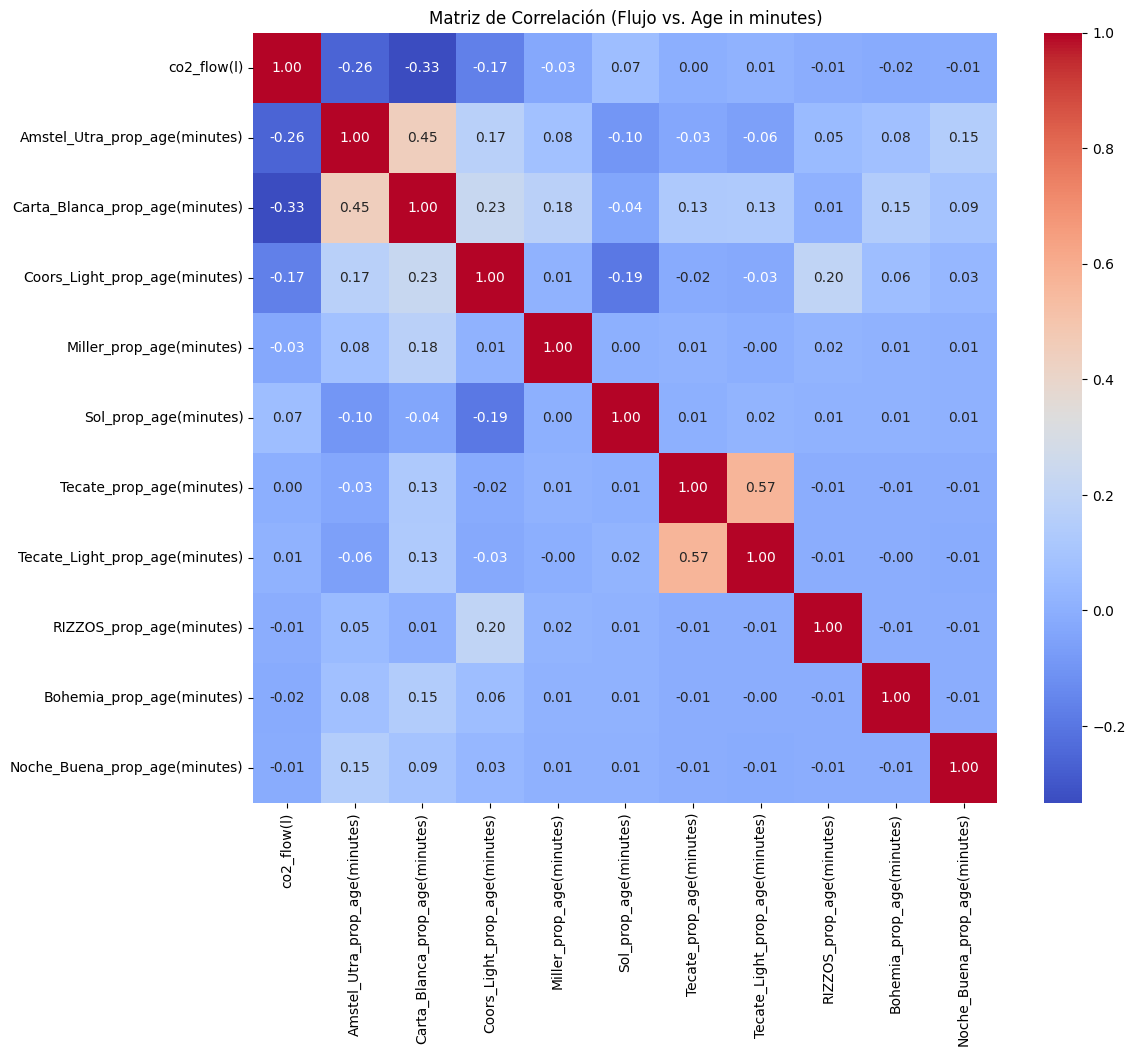

In [239]:
# Seleccionar las columnas para la matriz de correlación
correlation_columns = ['co2_flow(l)'] + [col for col in target_df.columns if 'prop_age(minutes)' in col]
correlation_df = target_df[correlation_columns]

# Calcular la matriz de correlación
correlation_matrix = correlation_df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (Flujo vs. Age in minutes)')
plt.show()

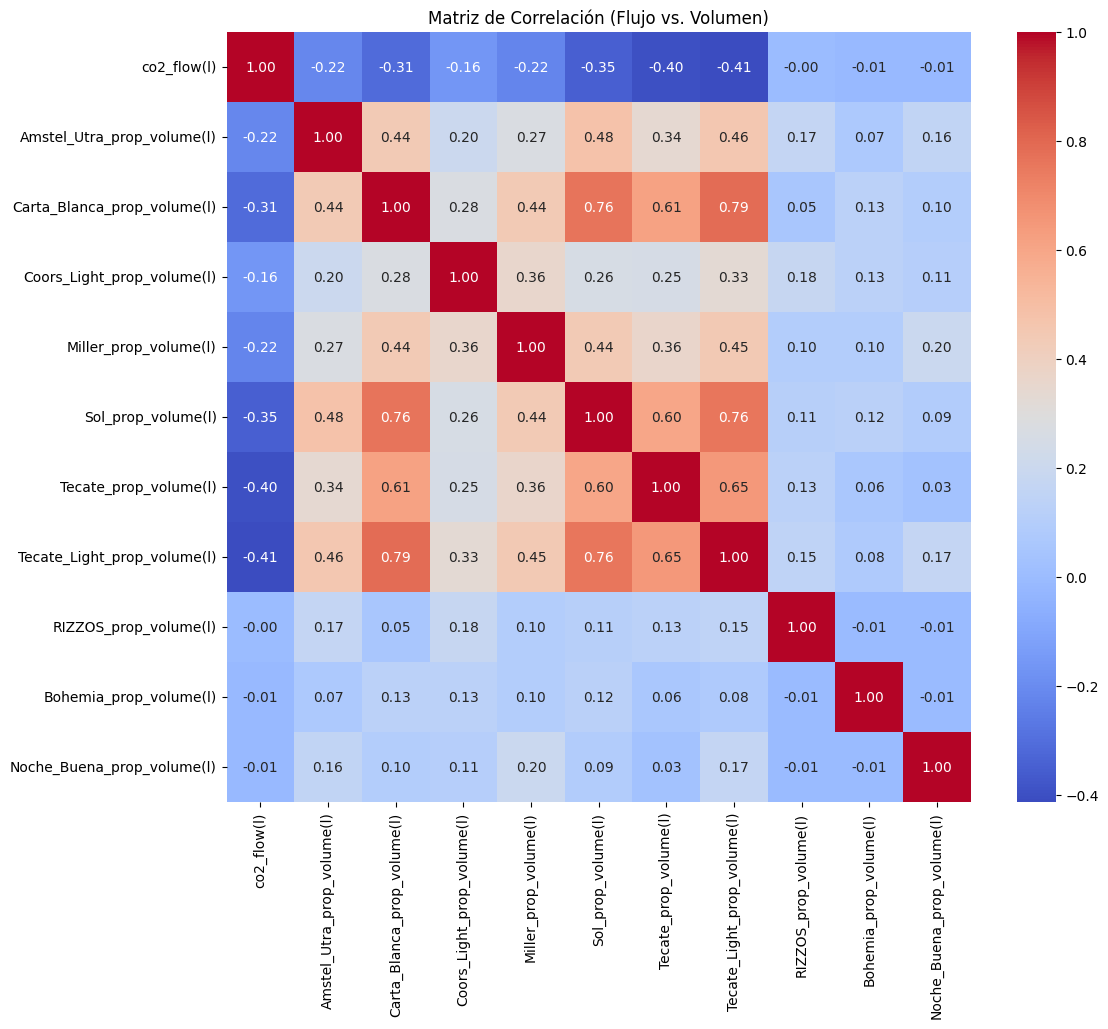

In [240]:
# Seleccionar las columnas para la matriz de correlación
correlation_columns = ['co2_flow(l)'] + [col for col in target_df.columns if 'prop_volume(l)' in col]
correlation_df = target_df[correlation_columns]

# Calcular la matriz de correlación
correlation_matrix = correlation_df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (Flujo vs. Volumen)')
plt.show()

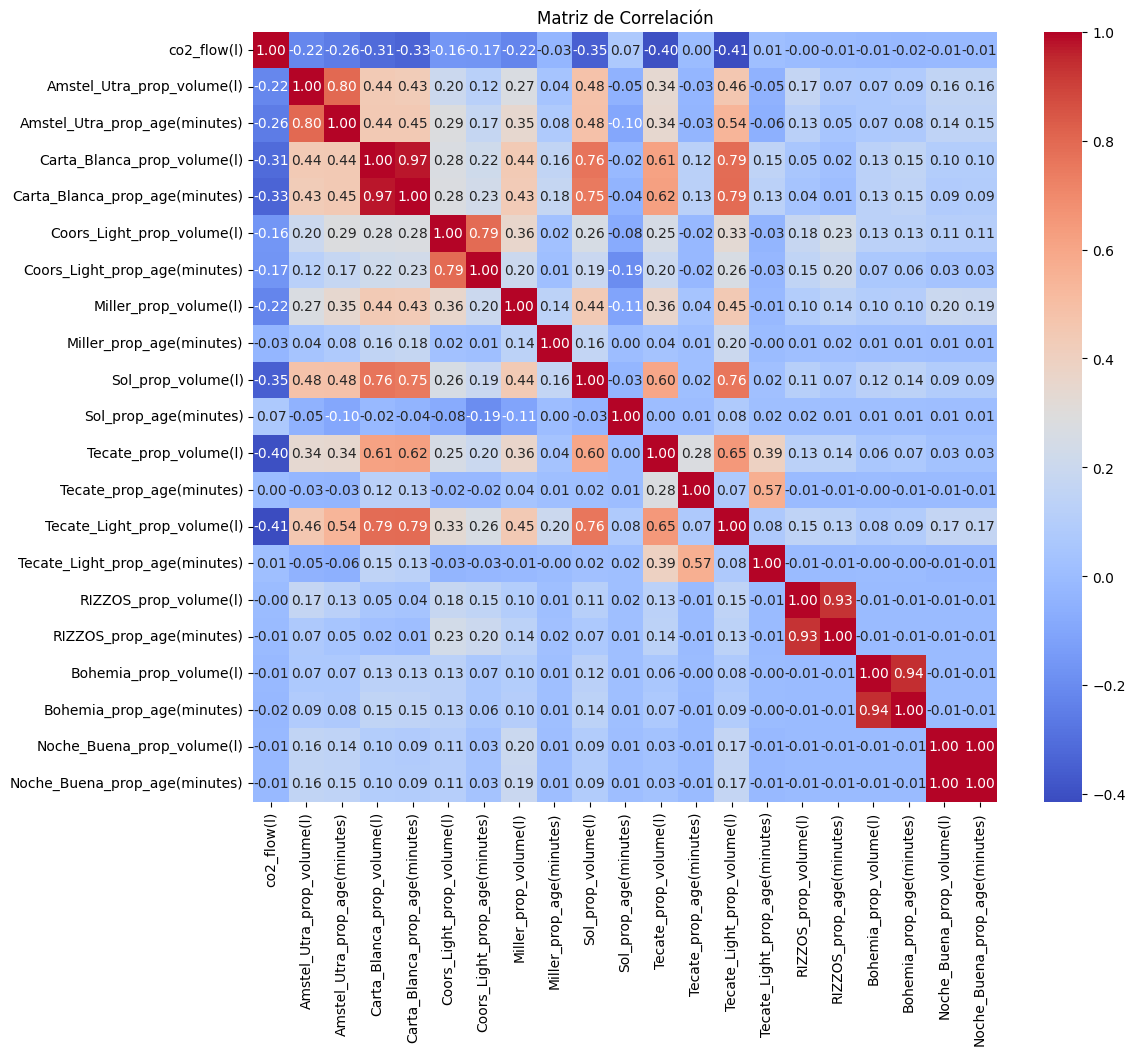

In [241]:
# Seleccionar las columnas para la matriz de correlación
correlation_columns = ['co2_flow(l)'] + [col for col in target_df.columns if 'prop_volume(l)' in col or 'prop_age(minutes)' in col]
correlation_df = target_df[correlation_columns]

# Calcular la matriz de correlación
correlation_matrix = correlation_df.corr()

# Importar la librería seaborn para graficar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

**Análisis de componentes principales (PCA)**

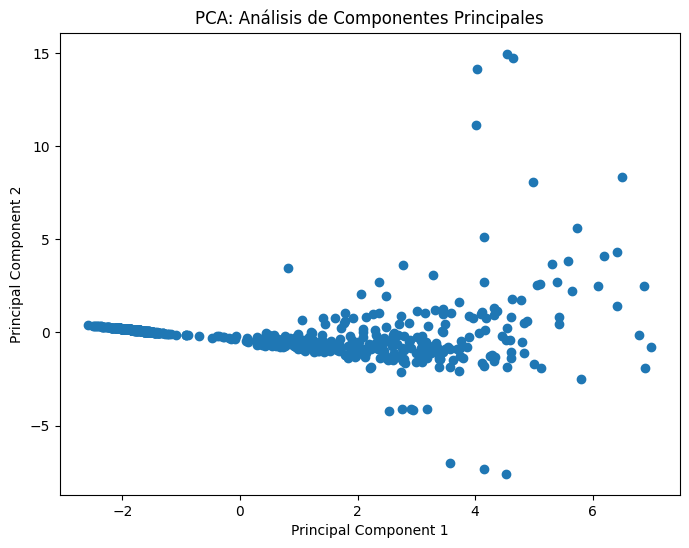

Varianza explicada por los componentes principales: [0.266874  0.1004504]


In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas para aplicar PCA
numerical_cols = [col for col in target_df.columns if 'prop_volume(l)' in col or 'prop_age(minutes)' in col or col == 'co2_flow(l)']
pca_df = target_df[numerical_cols]

# Estandarizar los datos
x = StandardScaler().fit_transform(pca_df)

# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Graficar los resultados de PCA
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Análisis de Componentes Principales')
plt.show()

# Imprimir la varianza explicada por cada componente principal
print('Varianza explicada por los componentes principales:', pca.explained_variance_ratio_)

**Análisis factorial (FA)**

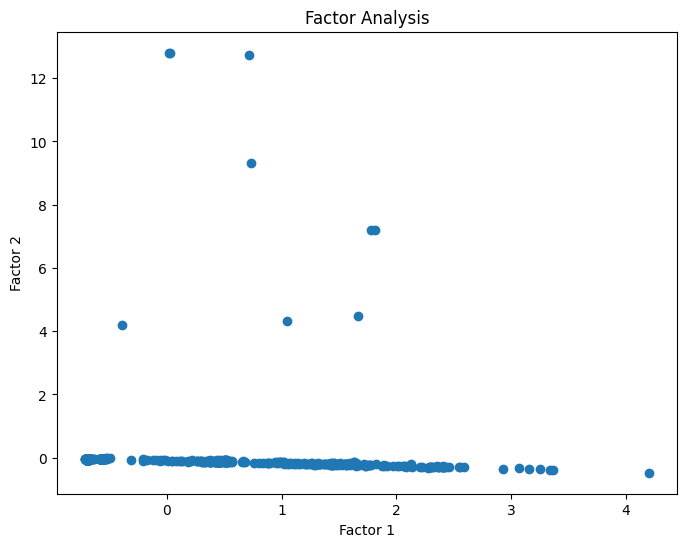

Varianza explicada por los factores: [0.88502329 0.78521098 0.7771657  0.02857067 0.02840111 0.86479842
 0.90697876 0.77911623 0.9700414  0.39090086 0.99909548 0.57716202
 0.98424426 0.32723729 0.98037638 0.10717622 0.02943165 0.98248467
 0.97685317 0.98978879 0.98918447]


In [247]:
from sklearn.decomposition import FactorAnalysis

# Seleccionar las columnas numéricas para aplicar Factor Analysis
numerical_cols = [col for col in target_df.columns if 'prop_volume(l)' in col or 'prop_age(minutes)' in col or col == 'co2_flow(l)']
fa_df = target_df[numerical_cols]

# Estandarizar los datos
x = StandardScaler().fit_transform(fa_df)

# Aplicar Factor Analysis con 2 factores
fa = FactorAnalysis(n_components=2)
factorComponents = fa.fit_transform(x)
factorDf = pd.DataFrame(data = factorComponents, columns = ['factor 1', 'factor 2'])

# Graficar los resultados de Factor Analysis
plt.figure(figsize=(8, 6))
plt.scatter(factorDf['factor 1'], factorDf['factor 2'])
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis')
plt.show()

# Imprimir la varianza explicada por cada factor
print('Varianza explicada por los factores:', fa.noise_variance_)

# **Conclusiones**

Partiendo de las conclusiones presentadas para el primer avance, se considera relevante lo ejecutado en la ingeniería de características